In [23]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

%matplotlib inline

In [24]:
trf = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

In [25]:
trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True,
    transform=trf
)
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=trf
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=False, 
    num_workers=2
)

classes = (
    'plane', 'car', 'bird', 'cat',
    'deer', 'dog', 'frog', 'horse',
    'ship', 'truck'
)

Files already downloaded and verified
Files already downloaded and verified


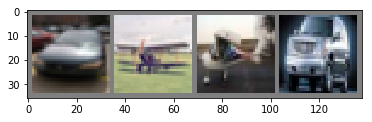

  car plane plane   car


In [26]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 随机获取训练图片
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 显示图片
imshow(torchvision.utils.make_grid(images))
# 打印图片标签
print(' '.join(
    '%5s' % classes[labels[j]] for j in range(4)
))

In [27]:
from py_files.study3 import Net
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),
                      lr=0.001,
                      momentum=0.9)
net = Net()
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [28]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.305
[1,  4000] loss: 2.305
[1,  6000] loss: 2.306
[1,  8000] loss: 2.306
[1, 10000] loss: 2.306
[1, 12000] loss: 2.306
[2,  2000] loss: 2.305
[2,  4000] loss: 2.307
[2,  6000] loss: 2.308
[2,  8000] loss: 2.306
[2, 10000] loss: 2.304
[2, 12000] loss: 2.305
Finished Training


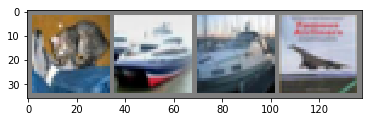

GroundTruth:    cat  ship  ship plane


In [29]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 输出图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [30]:
outputs = net(images)
outputs

tensor([[-0.0399,  0.0528,  0.0211,  0.1387, -0.0442,  0.0525, -0.1044,  0.0996,
         -0.0819, -0.0071],
        [-0.0382,  0.0479,  0.0276,  0.1414, -0.0516,  0.0483, -0.0998,  0.1217,
         -0.0922,  0.0005],
        [-0.0464,  0.0461,  0.0274,  0.1360, -0.0544,  0.0613, -0.1079,  0.1041,
         -0.0828,  0.0033],
        [-0.0403,  0.0453,  0.0066,  0.1404, -0.0535,  0.0533, -0.1049,  0.1048,
         -0.0753,  0.0002]], grad_fn=<AddmmBackward>)

In [31]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat   cat   cat   cat


In [32]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 9 %


In [33]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane :  0 %
Accuracy of   car :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat : 99 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of  frog :  0 %
Accuracy of horse :  0 %
Accuracy of  ship :  0 %
Accuracy of truck :  0 %


In [34]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [38]:
net.to(device)
inputs, labels = inputs.to(device), labels.to(device)